In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Understanding Data

-  Observe Data and Columns
-  Number of Entries and Shape of Data
-  Numeric and Categorical terms



In [72]:
#Read the dataset through the panda library
data = pd.read_csv("day.csv")

#Let's undertand the attributes available in the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [73]:
data.shape

(730, 16)

In [74]:
#Identify the columns having the missing values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [75]:
#Through panda.describtion function we can identify the continous and catagorical attributes 
#And Moreover we can identify if column is relevant or having all unique values.
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Data Preparation or Cleaning

-  Remove irrelevant columns (if any)
-  Data Typecasting to numeric or string (if not properly formattted already)
-  Data visualisation
-  Create Dummy variables
-  Create Derived Columns




In [76]:
#We can drop dteday because this attribute is having all the unique attributes and can not be used to identify the linear relation
#As per the requirment we have to identify the linear relation with Total count of rented bike so we can drop casual and registered attributes.
data=data.drop(["instant","dteday", "casual", "registered"], axis=1)

In [77]:
data.season.replace([1,2,3,4],['spring','summer','fall','winter'],inplace=True)
data.weathersit.replace([1,2,3,4],['clear','cloudy','lightrain','heavyrain'],inplace=True)
data.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],inplace=True)
data.weekday.replace([1,2,3,4,5,6,0],['monday','tuesday','wednesday','thrusday','friday','satuarday','sunday'],inplace=True)
# Check what the dataset 'status' looks like
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,satuarday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


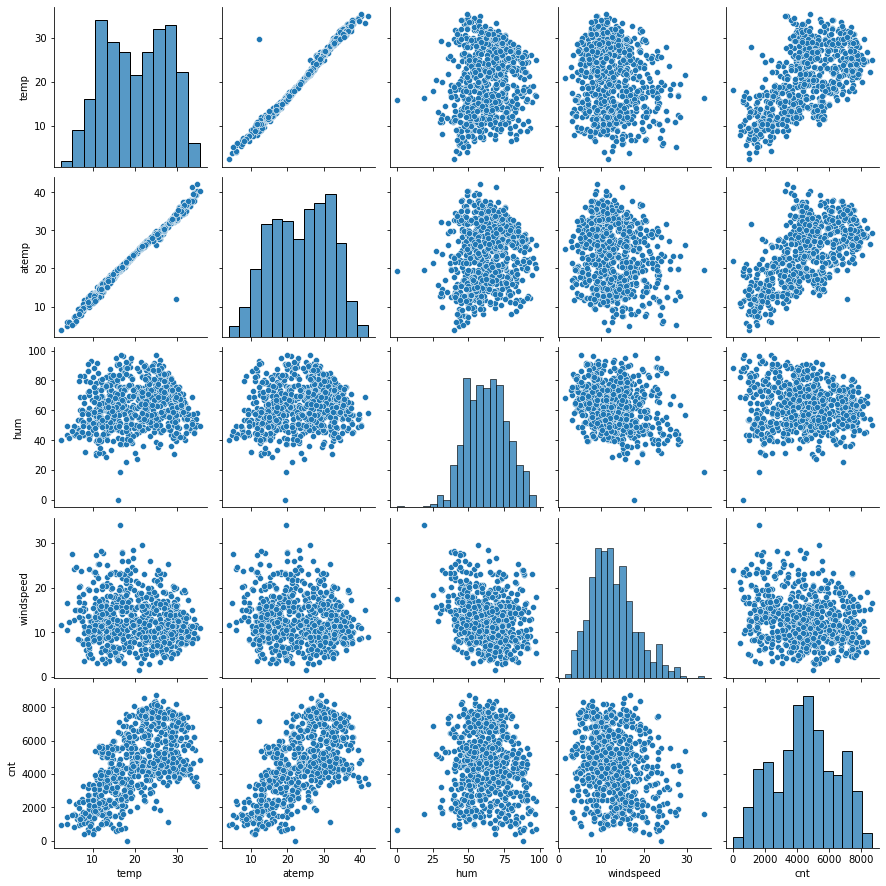

In [78]:
#visualising the numaric varables
continuous_variables = data[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(continuous_variables)
plt.show()

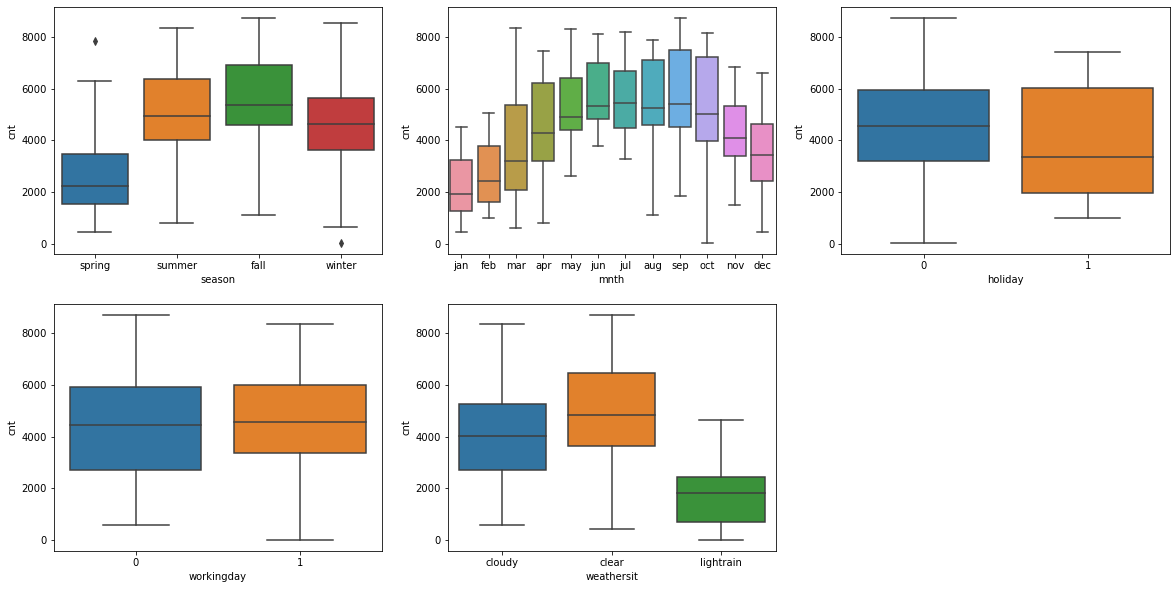

In [79]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()


In [80]:
#removing atemp as it is highly correlated to temp
data.drop('atemp', axis=1,inplace=True)

## Creating Dummy variables

In [81]:
def add_dummy(data, column_name):
    dummy_column = pd.get_dummies(data[column_name], drop_first=True)
    data=data.drop(column_name, axis=1)
    data=pd.concat([data,dummy_column],axis=1)
    return data


In [82]:
data=add_dummy(data,"season")
data=add_dummy(data,"weathersit")
data=add_dummy(data,"mnth")
data=add_dummy(data,"weekday")
data.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,monday,satuarday,sunday,thrusday,tuesday,wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model building and evaluation
-  Split the dataset between train and test
-  Scaling
-  Build the model


In [83]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

<AxesSubplot:>

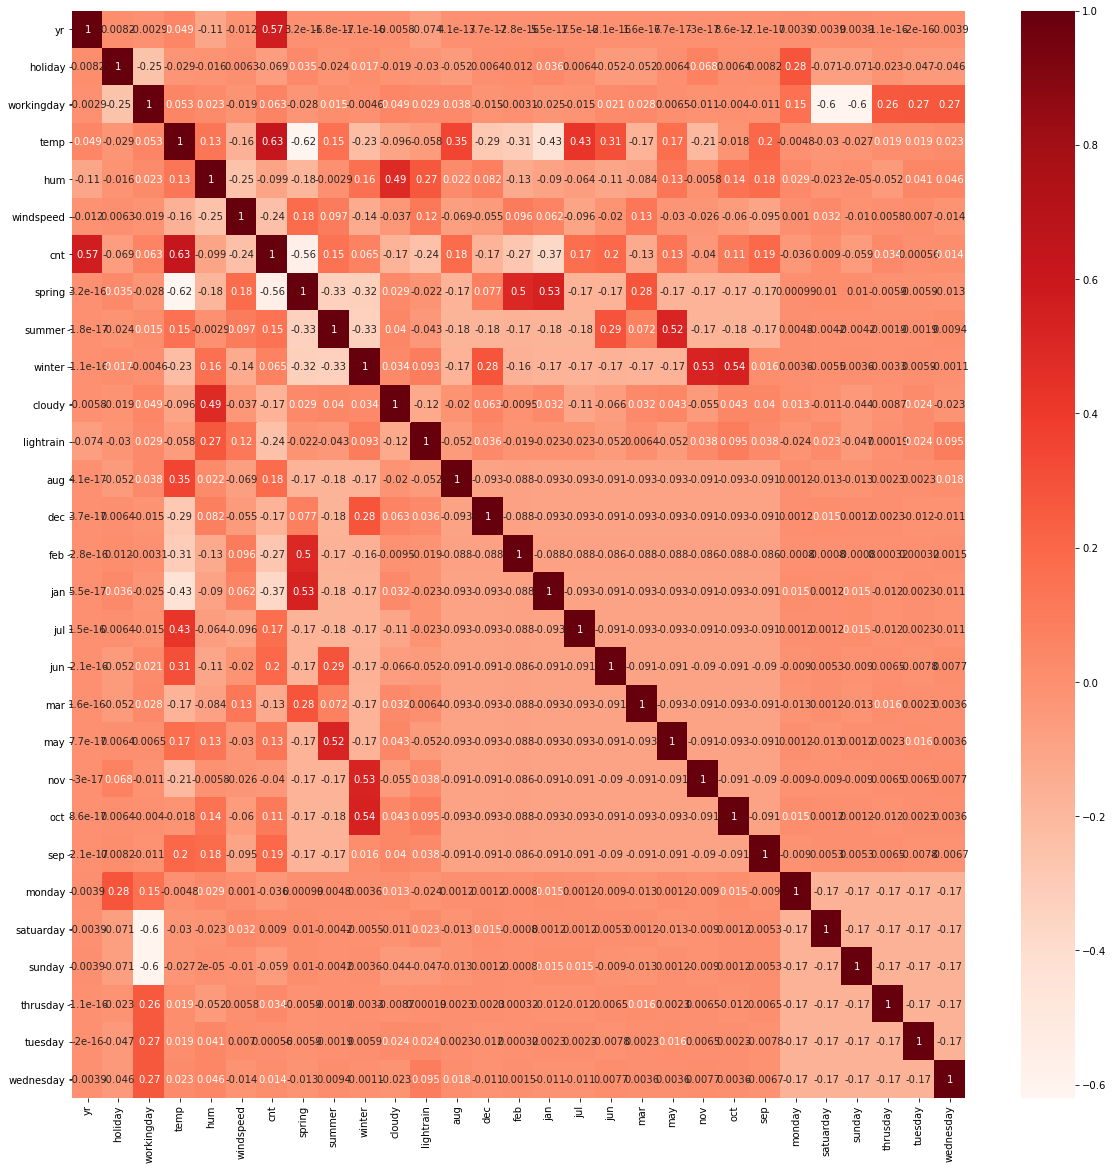

In [85]:
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(data.corr(),annot = True,cmap='Reds')

### temp is having the highest correlation with the cnt attribute. One approach could be that we can start with temp attribute and will try to get the linear dependency by increasing the attributes step-by-step. But we will starting with all the attributes and will try to eliminate the less significant attributes.

In [86]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scale_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

In [87]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,monday,satuarday,sunday,thrusday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model Building

In [89]:
import statsmodels.api as sm

def build_model(X, y):
    # Add a constant
    X = sm.add_constant(X)
    # Create a first fitted model
    lr = sm.OLS(y, X).fit()
    print(lr.summary())
    return X
    
def calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [90]:
X_train = build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          8.74e-182
Time:                        19:37:16   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2451      0.035      6.955      0.0

### 84.5% Adjusted R-square is quite good but still we will try to reduce the no of features and will try to get the relevant attributes only. Currently we are having 29 attributes which is not relevant to go manually eleminate. So, we would be using Recursive Feature Elemination to select features. We would be starting 15 features. 

## Model building with RFE

In [22]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [91]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [92]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'cloudy', 'lightrain', 'jan', 'jul', 'sep', 'satuarday',
       'sunday'],
      dtype='object')

In [93]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          4.03e-190
Time:                        19:37:33   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2503      0.025      9.865      0.0

### holiday is having the biggest value and greater then 0.05, So droping holiday attribute

In [94]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

## Model 3

In [95]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          4.03e-190
Time:                        19:37:40   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2443      0.040      6.120      0.0

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_new_without_const = X_train_new.drop("const", axis=1)
vif = calculate_VIF(X_train_new_without_const)
print(vif)

      Features    VIF
3          hum  29.73
2         temp  18.10
1   workingday  17.04
12   satuarday   4.60
4    windspeed   4.55
13      sunday   4.47
5       spring   3.11
7       cloudy   2.28
6       winter   2.18
0           yr   2.09
9          jan   1.68
10         jul   1.41
8    lightrain   1.23
11         sep   1.21


### hum is having the biggest VIF value and greater then 5, So droping hum attribute

In [97]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

## Model 5

In [98]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          3.12e-188
Time:                        19:37:51   Log-Likelihood:                 506.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     496   BIC:                            -926.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1686      0.035      4.817      0.0

In [99]:
X_train_new_without_const = X_train_new.drop("const", axis=1)
vif = calculate_VIF(X_train_new_without_const)
print(vif)

      Features    VIF
1   workingday  13.48
2         temp  12.76
3    windspeed   4.51
11   satuarday   3.85
12      sunday   3.60
4       spring   2.85
0           yr   2.07
5       winter   1.79
8          jan   1.65
6       cloudy   1.58
9          jul   1.38
10         sep   1.20
7    lightrain   1.09


### satuarday is having the biggest value and greater then 0.05, So droping satuarday attribute

In [100]:
X_train_new = X_train_new.drop(["satuarday"], axis = 1)

## Model 6

In [101]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.6
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.16e-185
Time:                        19:37:57   Log-Likelihood:                 498.00
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     497   BIC:                            -915.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2685      0.026     10.292      0.0

In [102]:
X_train_new_without_const = X_train_new.drop("const", axis=1)
vif = calculate_VIF(X_train_new_without_const)
print(vif)

      Features   VIF
2         temp  6.65
1   workingday  4.27
3    windspeed  4.06
4       spring  2.37
0           yr  2.07
11      sunday  1.68
8          jan  1.61
6       cloudy  1.54
5       winter  1.47
9          jul  1.36
10         sep  1.20
7    lightrain  1.08


### temp is having the biggest VIF value and greater then 5, So droping temp attribute

In [103]:
X_train_new = X_train_new.drop(["temp"], axis = 1)

# Model 7

In [104]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     153.4
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          4.28e-152
Time:                        19:38:08   Log-Likelihood:                 415.69
No. Observations:                 510   AIC:                            -807.4
Df Residuals:                     498   BIC:                            -756.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5619      0.018     31.838      0.0

In [105]:
X_train_new_without_const = X_train_new.drop("const", axis=1)
vif = calculate_VIF(X_train_new_without_const)
print(vif)

      Features   VIF
2    windspeed  3.34
1   workingday  3.01
3       spring  2.19
0           yr  1.90
7          jan  1.59
5       cloudy  1.51
4       winter  1.45
10      sunday  1.44
8          jul  1.15
9          sep  1.11
6    lightrain  1.08


### jul is having the biggest value and greater then 0.05, So droping jul attribute

In [106]:
X_train_new = X_train_new.drop(["jul"], axis = 1)

# Model 8

In [107]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          5.18e-153
Time:                        19:38:34   Log-Likelihood:                 415.19
No. Observations:                 510   AIC:                            -808.4
Df Residuals:                     499   BIC:                            -761.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5662      0.017     33.130      0.0

### workingday is having the biggest value and greater then 0.05, So droping workingday attribute

In [108]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

# Model 9

In [109]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          4.31e-154
Time:                        19:38:41   Log-Likelihood:                 415.03
No. Observations:                 510   AIC:                            -810.1
Df Residuals:                     500   BIC:                            -767.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5723      0.013     43.029      0.0

In [110]:
X_train_new_without_const = X_train_new.drop("const", axis=1)
vif = calculate_VIF(X_train_new_without_const)
print(vif)

    Features   VIF
1  windspeed  2.58
2     spring  2.12
0         yr  1.74
6        jan  1.59
4     cloudy  1.45
3     winter  1.37
8     sunday  1.15
7        sep  1.09
5  lightrain  1.08


In [111]:
X_train_new.head()

,const,yr,windspeed,spring,winter,cloudy,lightrain,jan,sep,sunday
653,1.0,1,0.300794,0,1,0,0,0,0,0
576,1.0,1,0.264686,0,0,0,0,0,0,0
426,1.0,1,0.255342,1,0,1,0,0,0,0
728,1.0,1,0.663106,1,0,0,0,0,0,1
482,1.0,1,0.188475,0,0,1,0,0,0,0


Fow the above model summary we are having 9 features and all the p-values are below 0.05 and corrsponding VIF values are less then 5 which is all values lies within the expected range. 
### We can say this will be our final model

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [112]:
lm=sm.OLS(y_train,X_train_new).fit()
y_train_Pred_cnt = lm.predict(X_train_new)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          4.31e-154
Time:                        19:38:54   Log-Likelihood:                 415.03
No. Observations:                 510   AIC:                            -810.1
Df Residuals:                     500   BIC:                            -767.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5723      0.013     43.029      0.000       0.546       0.598
yr             0.2486      0.010     25.831      0.000       0.230       0.268
windspeed     -0.2032      0.029     -6.948      0.000      -0.261      -0.146
spring        -0.2368      0.014    -16.511      0.000      -0.265      -0.209
winter        -0.0546      0.012     -4.589      0.000      -0.078      -0.031
cloudy        -0.0901      0.010     -8.790      0.000      -0.110      -0.070
lightrain     -0.2990      0.029    -10.279      0.000      -0.356      -0.242
jan           -0.1040      0.020     -5.097      0.000      -0.144      -0.064
sep            0.0862      0.018      4.764      0.000       0.051       0.122
sunday        -0.0465      0.014     -3.383      0.001      -0.074      -0.019
==============================================================================
Omnibus:                       47.207   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.456
Skew:                          -0.530   Prob(JB):                     2.53e-22
Kurtosis:                       4.886   Cond. No.                         8.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Errors')

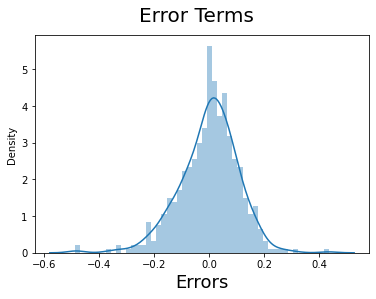

In [113]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_Pred_cnt), bins = 50)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

Text(0, 0.5, 'Error')

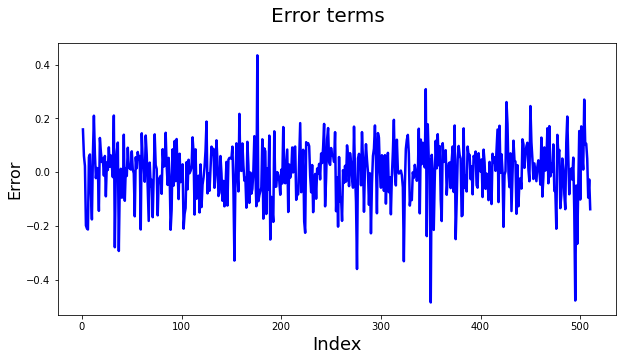

In [114]:
#Actual vs Predicted
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize = (10,5))
plt.plot(c,(y_train - y_train_Pred_cnt), color="blue", linewidth=2.5, linestyle="-")

fig.suptitle('Error terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Error', fontsize=16)  

#### Printing Actual (color blue) and Predicted (color red) with same plot

Text(0, 0.5, 'Views')

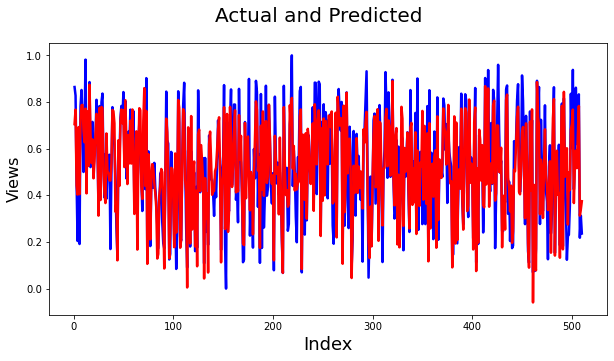

In [115]:
#Actual vs Predicted
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize = (10,5))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_Pred_cnt, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)   

In [116]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scale_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[scale_vars] = scaler.transform(df_test[scale_vars])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,monday,satuarday,sunday,thrusday,tuesday,wednesday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [117]:
# Info of test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   hum         219 non-null    float64
 5   windspeed   219 non-null    float64
 6   cnt         219 non-null    float64
 7   spring      219 non-null    uint8  
 8   summer      219 non-null    uint8  
 9   winter      219 non-null    uint8  
 10  cloudy      219 non-null    uint8  
 11  lightrain   219 non-null    uint8  
 12  aug         219 non-null    uint8  
 13  dec         219 non-null    uint8  
 14  feb         219 non-null    uint8  
 15  jan         219 non-null    uint8  
 16  jul         219 non-null    uint8  
 17  jun         219 non-null    uint8  
 18  mar         219 non-null    uint8  
 19  may         219 non-null    

#### All values are non null. Dividing the test into X_test and y_test

In [118]:
y_test = df_test.pop('cnt')
X_test = df_test

In [119]:
X_test=sm.add_constant(X_test)

In [120]:
X_test=X_test[X_train_new.columns]
y_test_Pre_cnt = lm.predict(X_test)

Text(0.5, 0, 'Errors')

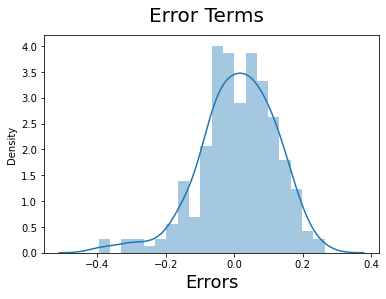

In [121]:
# Plot the histogram of the error terms test data
fig = plt.figure()
sns.distplot((y_test - y_test_Pre_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0, 0.5, 'y_pred')

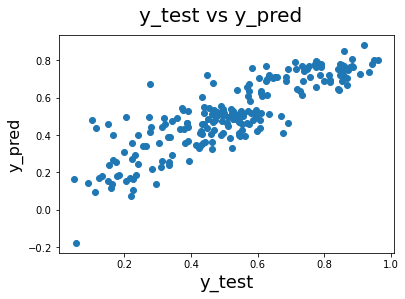

In [122]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_Pre_cnt)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

From above plot we can say that actual value and predicted values arehighly correlated.

R-Square for test

In [123]:
from sklearn.metrics import r2_score
RSq=r2_score(y_true=y_test,y_pred=y_test_Pre_cnt)
RSq

0.7349092685461958

In [127]:
N=219
P=10
adjr=1-((1-RSq)*(N-1)/(N-P-1))
adjr

0.7221645218416859

Text(0, 0.5, 'Views')

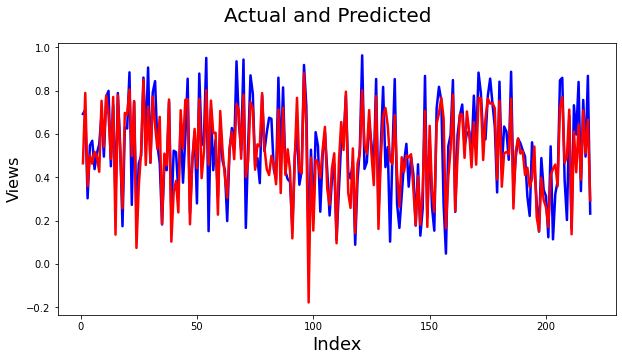

In [125]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize = (10,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_Pre_cnt, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)   

Actual and predicted values are overlapping. So we can say this is a good model.

# Final Analysis

-  Train R-squared: 	0.772
-  Train Adjusted R-square: 0.767
-  Test R-squared: 	0.735
-  Train Adjusted R-square: 0.722
-  As there is less diffrence between R-Square and adjusted R-Square for both datasets and diffrence between test and train adjusted R-Square is below 0.05 we can say that it was a good model 

## $cnt = 0.5723 + 0.2486 * yr - 0.2032 * windspeed - 0.2368 * spring - 0.0546*winter - 0.0901*cloudy	-0.299*lightrain - 0.104*jan + 0.0862*sep - 0.0465*sunday$